# Mysql Connection

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root"
)

cursor = conn.cursor()
print("Connected Successfully")


Connected Successfully


# Create Database 

In [2]:
cursor.execute("CREATE DATABASE IF NOT EXISTS banking_system")
cursor.execute("USE banking_system")
print("Database Created")


Database Created


# Create Tables

In [7]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INT PRIMARY KEY AUTO_INCREMENT,
    customer_name VARCHAR(100),
    city VARCHAR(50),
    account_balance DECIMAL(12,2)
)
""")
print("table created")


table created


In [8]:
#Transaction table

cursor.execute("""
CREATE TABLE IF NOT EXISTS transactions (
    transaction_id INT PRIMARY KEY AUTO_INCREMENT,
    customer_id INT,
    transaction_date DATE,
    transaction_type VARCHAR(20),
    amount DECIMAL(12,2),
    location VARCHAR(50),
    device_type VARCHAR(50),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
)
""")
print("Table Created")


Table Created


In [9]:
#insert data into customer

customers = [
('Aditi', 'Mumbai', 500000),
('Rahul', 'Delhi', 700000),
('Sneha', 'Pune', 450000),
('Aman', 'Bangalore', 600000),
('Priya', 'Chennai', 550000),
('Rohit', 'Hyderabad', 480000),
('Neha', 'Kolkata', 520000),
('Vikas', 'Jaipur', 300000),
('Anjali', 'Ahmedabad', 650000),
('Karan', 'Lucknow', 400000)
]

cursor.executemany(
    "INSERT INTO customers (customer_name, city, account_balance) VALUES (%s,%s,%s)",
    customers
)
conn.commit()


In [10]:
#insert data into transactions table

transactions = [
(1,'2026-02-01','Debit',5000,'Mumbai','ATM'),
(1,'2026-02-02','Debit',85000,'Delhi','Web'),
(2,'2026-02-03','Credit',20000,'Delhi','Mobile'),
(3,'2026-02-04','Debit',150000,'Kolkata','Web'),
(4,'2026-02-05','Debit',3000,'Bangalore','ATM'),
(5,'2026-02-06','Debit',120000,'Hyderabad','Web'),
(6,'2026-02-07','Debit',2500,'Hyderabad','ATM'),
(7,'2026-02-08','Debit',95000,'Delhi','Web'),
(8,'2026-02-09','Debit',4000,'Jaipur','ATM'),
(9,'2026-02-10','Credit',35000,'Ahmedabad','Mobile'),
(10,'2026-02-11','Debit',175000,'Mumbai','Web'),
(2,'2026-02-12','Debit',80000,'Mumbai','Web'),
(3,'2026-02-13','Debit',1500,'Pune','ATM'),
(4,'2026-02-14','Credit',50000,'Bangalore','Mobile'),
(5,'2026-02-15','Debit',200000,'Delhi','Web'),
(6,'2026-02-16','Debit',70000,'Kolkata','Web'),
(7,'2026-02-17','Debit',6000,'Kolkata','ATM'),
(8,'2026-02-18','Debit',130000,'Delhi','Web'),
(9,'2026-02-19','Debit',9000,'Ahmedabad','ATM'),
(10,'2026-02-20','Debit',110000,'Chennai','Web'),
(1,'2026-02-21','Debit',75000,'Pune','Web'),
(2,'2026-02-22','Debit',3000,'Delhi','ATM'),
(3,'2026-02-23','Debit',95000,'Mumbai','Web'),
(4,'2026-02-24','Debit',180000,'Delhi','Web'),
(5,'2026-02-25','Debit',4000,'Chennai','ATM'),
(6,'2026-02-26','Debit',145000,'Delhi','Web'),
(7,'2026-02-27','Debit',50000,'Mumbai','Mobile'),
(8,'2026-02-28','Debit',160000,'Kolkata','Web'),
(9,'2026-03-01','Debit',2000,'Ahmedabad','ATM'),
(10,'2026-03-02','Debit',190000,'Delhi','Web')
]

cursor.executemany("""
INSERT INTO transactions
(customer_id, transaction_date, transaction_type, amount, location, device_type)
VALUES (%s,%s,%s,%s,%s,%s)
""", transactions)

conn.commit()
print("Data Inserted Successfully")


Data Inserted Successfully


In [11]:
query = """
SELECT t.*, c.customer_name, c.city
FROM transactions t
JOIN customers c ON t.customer_id = c.customer_id
"""

df = pd.read_sql(query, conn)
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_22152\620506167.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,transaction_id,customer_id,transaction_date,transaction_type,amount,location,device_type,customer_name,city
0,1,1,2026-02-01,Debit,5000.0,Mumbai,ATM,Aditi,Mumbai
1,2,1,2026-02-02,Debit,85000.0,Delhi,Web,Aditi,Mumbai
2,21,1,2026-02-21,Debit,75000.0,Pune,Web,Aditi,Mumbai
3,3,2,2026-02-03,Credit,20000.0,Delhi,Mobile,Rahul,Delhi
4,12,2,2026-02-12,Debit,80000.0,Mumbai,Web,Rahul,Delhi


# Risk score calculation

In [12]:
def calculate_risk(row):
    risk = 0
    
    if row['amount'] > 100000:
        risk += 50
        
    if row['location'] != row['city']:
        risk += 30
        
    if row['device_type'] == 'Web':
        risk += 20
        
    return risk

df['risk_score'] = df.apply(calculate_risk, axis=1)


# Fraud 

In [13]:
def check_risk(score):
    if score >= 50:
        return "High Risk"
    else:
        return "Low Risk"

df['fraud_flag'] = df['risk_score'].apply(check_risk)

df[['transaction_id','customer_name','amount','risk_score','fraud_flag']].head()


,transaction_id,customer_name,amount,risk_score,fraud_flag
0,1,Aditi,5000.0,0,Low Risk
1,2,Aditi,85000.0,50,High Risk
2,21,Aditi,75000.0,50,High Risk
3,3,Rahul,20000.0,0,Low Risk
4,12,Rahul,80000.0,50,High Risk


# High Risk Transaction

In [14]:
high_risk = df[df['fraud_flag'] == "High Risk"]
high_risk


,transaction_id,customer_id,transaction_date,transaction_type,amount,location,device_type,customer_name,city,risk_score,fraud_flag
1,2,1,2026-02-02,Debit,85000.0,Delhi,Web,Aditi,Mumbai,50,High Risk
2,21,1,2026-02-21,Debit,75000.0,Pune,Web,Aditi,Mumbai,50,High Risk
4,12,2,2026-02-12,Debit,80000.0,Mumbai,Web,Rahul,Delhi,50,High Risk
6,4,3,2026-02-04,Debit,150000.0,Kolkata,Web,Sneha,Pune,100,High Risk
8,23,3,2026-02-23,Debit,95000.0,Mumbai,Web,Sneha,Pune,50,High Risk
11,24,4,2026-02-24,Debit,180000.0,Delhi,Web,Aman,Bangalore,100,High Risk
12,6,5,2026-02-06,Debit,120000.0,Hyderabad,Web,Priya,Chennai,100,High Risk
13,15,5,2026-02-15,Debit,200000.0,Delhi,Web,Priya,Chennai,100,High Risk
16,16,6,2026-02-16,Debit,70000.0,Kolkata,Web,Rohit,Hyderabad,50,High Risk
17,26,6,2026-02-26,Debit,145000.0,Delhi,Web,Rohit,Hyderabad,100,High Risk


# Risk Distribution Graph

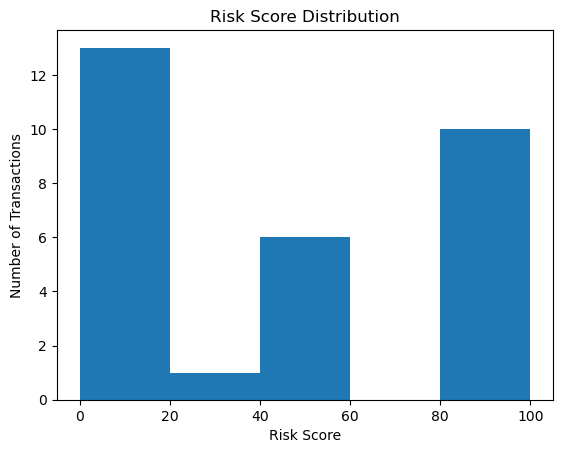

In [16]:
plt.hist(df['risk_score'], bins=5)
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Number of Transactions")
plt.show()
